<a href="https://colab.research.google.com/github/gilbert83416/NTUST-AI-Master-degree-Reference/blob/main/titanic_randomForest_KNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from urllib.request import urlretrieve
url = "https://github.com/gilbert83416/ML/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")
url = "https://github.com/gilbert83416/ML/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")

('train.csv', <http.client.HTTPMessage at 0x7f7a3b416450>)

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding = "utf-8")
test_df = pd.read_csv("test.csv", encoding = "utf-8")

In [ ]:
print(test_df)
print(train_df)

     PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            895       3  ...   NaN        S
4            896       3  ...   NaN        S
..           ...     ...  ...   ...      ...
413         1305       3  ...   NaN        S
414         1306       1  ...  C105        C
415         1307       3  ...   NaN        S
416         1308       3  ...   NaN        S
417         1309       3  ...   NaN        C

[418 rows x 11 columns]
     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      

In [ ]:
datas = pd.concat([train_df, test_df], axis= 0,ignore_index=True)
datas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# to ses the column is na nor not
print(datas.isna())
# Series[True/False]做篩選, True留下
s = datas.isna().sum()
print(s)
s[s>0].sort_values(ascending = False)

      PassengerId  Survived  Pclass   Name  ...  Ticket   Fare  Cabin  Embarked
0           False     False   False  False  ...   False  False   True     False
1           False     False   False  False  ...   False  False  False     False
2           False     False   False  False  ...   False  False   True     False
3           False     False   False  False  ...   False  False  False     False
4           False     False   False  False  ...   False  False   True     False
...           ...       ...     ...    ...  ...     ...    ...    ...       ...
1304        False      True   False  False  ...   False  False   True     False
1305        False      True   False  False  ...   False  False  False     False
1306        False      True   False  False  ...   False  False   True     False
1307        False      True   False  False  ...   False  False   True     False
1308        False      True   False  False  ...   False  False   True     False

[1309 rows x 12 columns]
PassengerId   

Cabin       1014
Survived     418
Age          263
Embarked       2
Fare           1
dtype: int64

In [ ]:
datas = datas.drop(["PassengerId","Survived"], axis = 1)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# 補數值類型, 中位數
med = datas.median().drop("Pclass")
print(med)
datas = datas.fillna(med)
datas

Age      28.0000
SibSp     0.0000
Parch     0.0000
Fare     14.4542
dtype: float64


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S


In [ ]:
# 補類別類型: 最常出現
most = datas["Embarked"].value_counts().idxmax()
print(most)
datas["Embarked"] = datas["Embarked"].fillna(most)
datas

S


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S


In [ ]:
s = datas.isna().sum()
# print(s)
s[s>0].sort_values(ascending = False)

Cabin    1014
dtype: int64

In [ ]:
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S


In [ ]:
# deal with cabin missing data
def cabin(s):
  if pd.isna(s):
    return None
  else:
    return s[0]
datas["Cabin"] = datas["Cabin"].apply(cabin)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,None,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,None,S
1307,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,None,S


In [ ]:
# 先用,切割   再用.取mr/ms/mrs ,取top 4 , and replace the rest of name to None
def name(s):
  mid = s.split(",")[-1].split(".")[0]
  mid = mid.strip()
  return mid
count = datas["Name"].apply(name).value_counts()
reserved = count[:4].index

def name2(s):
  mid = s.split(",")[-1].split(".")[0]
  mid = mid.strip()
  if mid in reserved:
    return mid
  else:
    return None

datas["Name"] = datas["Name"].apply(name2)
datas



,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,None,S
1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C,C
2,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,1,Mrs,female,35.0,1,0,113803,53.1000,C,S
4,3,Mr,male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,28.0,0,0,A.5. 3236,8.0500,None,S
1305,1,None,female,39.0,0,0,PC 17758,108.9000,C,C
1306,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,None,S
1307,3,Mr,male,28.0,0,0,359309,8.0500,None,S


In [ ]:
# 轉換成多少人共享同一ticket
dic = datas["Ticket"].value_counts()
def ticket(t):
  return dic[t]
datas["Ticket"] = datas["Ticket"].apply(ticket)

In [ ]:
# pandas get_dummies(): one-hot encoding: 有2種使用方法
datas = pd.get_dummies(datas)
datas

,Pclass,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
2,3,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
4,3,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1305,1,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1306,3,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1307,3,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
datas = pd.get_dummies(datas, columns=["Pclass"])
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
# ex: age 區間化(無意義: 用decision tree 可以亂數分的更好), Sibsp/Parch合在一個欄位(利用已知欄位,相加新增一個欄位 Family), 但不要隨便刪除欄位

datas["Family"] = datas["SibSp"] + datas["Parch"]
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
# 此處y not y_train
y = train_df["Survived"]
# .ilco 取 column [1st row, 2nd row...]
x = datas.iloc[:len(train_df)]
predict = datas.iloc[len(train_df):]
print(y)
print(x)
print(predict)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
      Age  SibSp  Parch  Ticket  ...  Pclass_1  Pclass_2  Pclass_3  Family
0    22.0      1      0       1  ...         0         0         1       1
1    38.0      1      0       2  ...         1         0         0       1
2    26.0      0      0       1  ...         0         0         1       0
3    35.0      1      0       2  ...         1         0         0       1
4    35.0      0      0       1  ...         0         0         1       0
..    ...    ...    ...     ...  ...       ...       ...       ...     ...
886  27.0      0      0       1  ...         0         1         0       0
887  19.0      0      0       1  ...         1         0         0       0
888  28.0      1      2       4  ...         0         0         1       3
889  26.0      0      0       1  ...         1         0         0       0
890  32.0      0      0       1  .

In [ ]:
# 進入模型階段, random forest(用不同資料產生不同樹, 若給不同演算法同一資料, result會很接近)
# 調整參數: cross validation(交叉驗證) 
# n_estimator：幾棵樹(10-200 OK)
from sklearn.ensemble import  RandomForestClassifier
# RandomForestClassifier(n_estimator：幾棵樹(10-200 OK), max_depth)


In [ ]:
# lass sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
# odd better than even *(11, 13, 15,...149)
params = {
    "n_estimators": range(11, 20),
    "max_depth": range(5, 7)
}
grid = GridSearchCV(clf, params, cv = 10, n_jobs= -1, scoring = "neg_log_loss")
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

-0.4028353359715194
{'max_depth': 6, 'n_estimators': 12}


In [ ]:
# 選擇參數 , accuracy_score在此處不適用, 因為死亡比率不精確, 用loss score (MSE loss/ Log loss)
# sklearn.model_selection.cross_val_score(estimator(要), X, y=None, *, groups=None, scoring=None(評分機制class:log loss(neg改越大越好 ), regression: r2), cv=None(要: 切/給幾份 ex:10份), n_jobs=None(要: 分成多份工作, depends on cpu(-1)), verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
import numpy as np
from sklearn.model_selection import cross_val_score
# RFC es and md 先隨便帶
# loss 比較準
clf = RandomForestClassifier(n_estimators=27, max_depth=6)
scores = cross_val_score(clf, x, y, cv= 10, n_jobs= -1)
print(scores)
print(np.average(scores))

clf = RandomForestClassifier(n_estimators=27, max_depth=6)
scores = cross_val_score(clf, x, y, cv= 10, n_jobs= -1, scoring="neg_log_loss")
print(scores)
print(np.average(scores))

[0.83333333 0.86516854 0.7752809  0.87640449 0.86516854 0.80898876
 0.84269663 0.7752809  0.87640449 0.80898876]
0.8327715355805243
[-0.4422347  -0.37037171 -0.59712878 -0.34008602 -0.35153434 -0.39615566
 -0.3987779  -0.4295942  -0.32236674 -0.36610574]
-0.40143557763426296


In [ ]:
clf = RandomForestClassifier(n_estimators=27, max_depth=6)
clf.fit(x,y)
pre = clf.predict(predict)
ans = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": pre
})
ans.to_csv("rf.csv", encoding = "utf-8", index = False)


In [ ]:
import pandas as pd
pd.DataFrame(clf.feature_importances_,
             columns = ["Importance"],
             index = datas.columns).sort_values(by = "Importance", ascending = False)

,Importance
Sex_male,0.180612
Sex_female,0.154556
Name_Mr,0.111029
Fare,0.107852
Age,0.063813
Pclass_3,0.058374
Ticket,0.048398
Family,0.044790
Name_Miss,0.037265
SibSp,0.034437


[Text(390.6, 665.91, 'Name_Miss <= 0.5\ngini = 0.475\nsamples = 574\nvalue = [546, 345]\nclass = Dead'),
 Text(195.3, 475.65, 'Pclass_3 <= 0.5\ngini = 0.427\nsamples = 453\nvalue = [485, 217]\nclass = Dead'),
 Text(97.65, 285.39, 'Sex_male <= 0.5\ngini = 0.5\nsamples = 209\nvalue = [160, 158]\nclass = Dead'),
 Text(48.825, 95.13, '\n  (...)  \n'),
 Text(146.47500000000002, 95.13, '\n  (...)  \n'),
 Text(292.95000000000005, 285.39, 'Name_Mrs <= 0.5\ngini = 0.26\nsamples = 244\nvalue = [325, 59]\nclass = Dead'),
 Text(244.125, 95.13, '\n  (...)  \n'),
 Text(341.77500000000003, 95.13, '\n  (...)  \n'),
 Text(585.9000000000001, 475.65, 'Ticket <= 4.5\ngini = 0.437\nsamples = 121\nvalue = [61, 128]\nclass = Alive'),
 Text(488.25, 285.39, 'Ticket <= 1.5\ngini = 0.38\nsamples = 103\nvalue = [41, 120]\nclass = Alive'),
 Text(439.425, 95.13, '\n  (...)  \n'),
 Text(537.075, 95.13, '\n  (...)  \n'),
 Text(683.5500000000001, 285.39, 'SibSp <= 0.5\ngini = 0.408\nsamples = 18\nvalue = [20, 8]\nclas

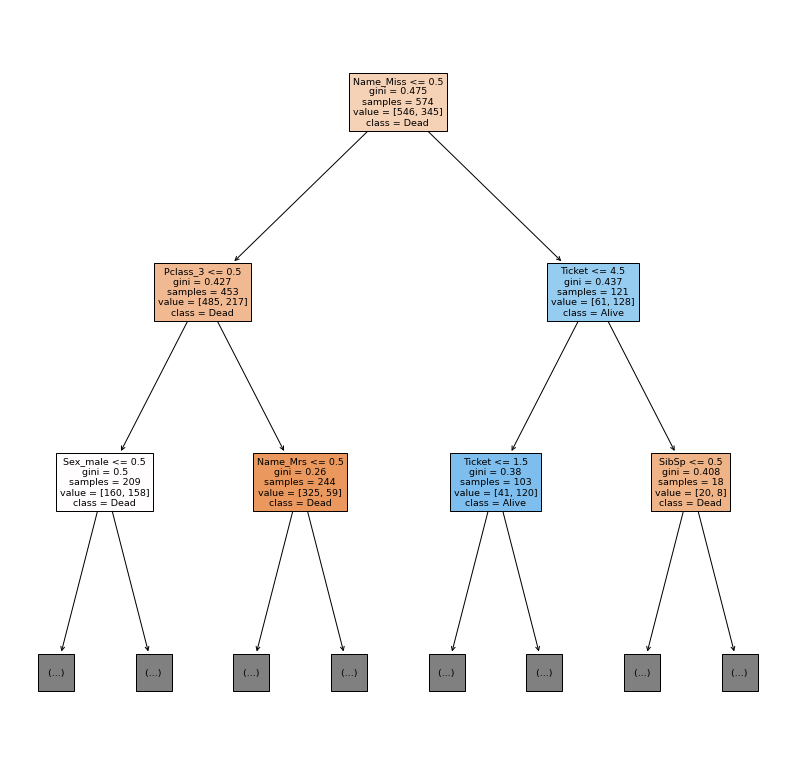

In [ ]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
dt = clf.estimators_[1]
plt.figure(figsize=(14, 14))
plot_tree(dt, 
     feature_names=datas.columns, 
     class_names=["Dead", "Alive"],
     max_depth=2, 
     filled=True)

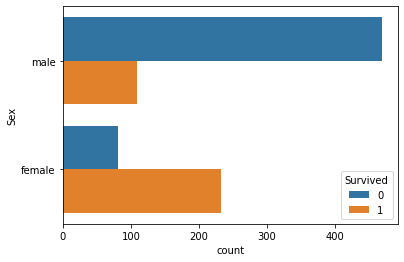

In [ ]:
import seaborn as sns
sns.countplot(y=train_df["Sex"], hue=train_df["Survived"])

Text(0.5, 1.0, 'Fare Plot')

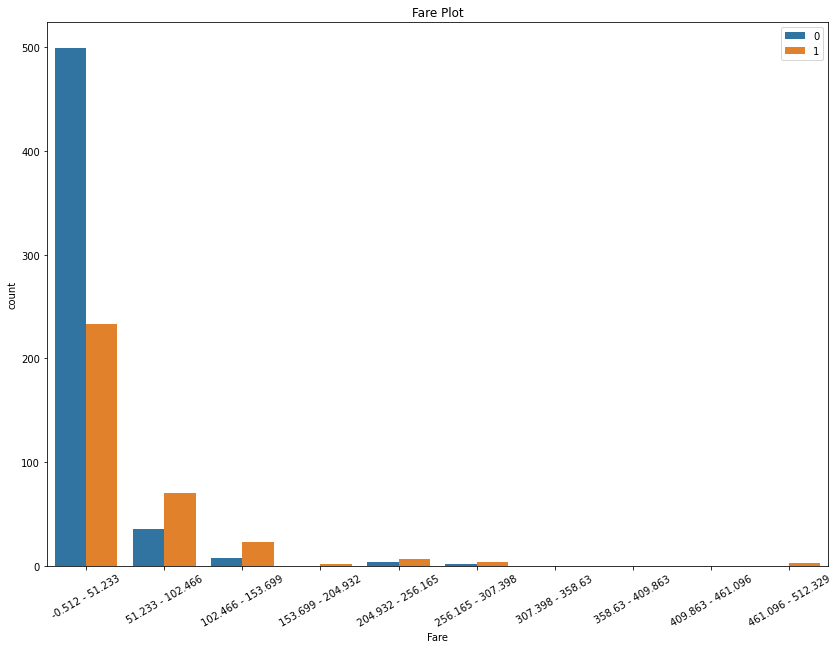

In [ ]:
# tick label rotation matplotlib
c = pd.cut(train_df["Fare"], bins=10)
def beautify(s):
    return str(s)[1:-1].replace(", ", " - ")
b = c.apply(beautify)
plt.figure(figsize=(14, 10))
sns.countplot(x=b, hue=train_df["Survived"])
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.title("Fare Plot")

Text(0.5, 1.0, 'Age Plot')

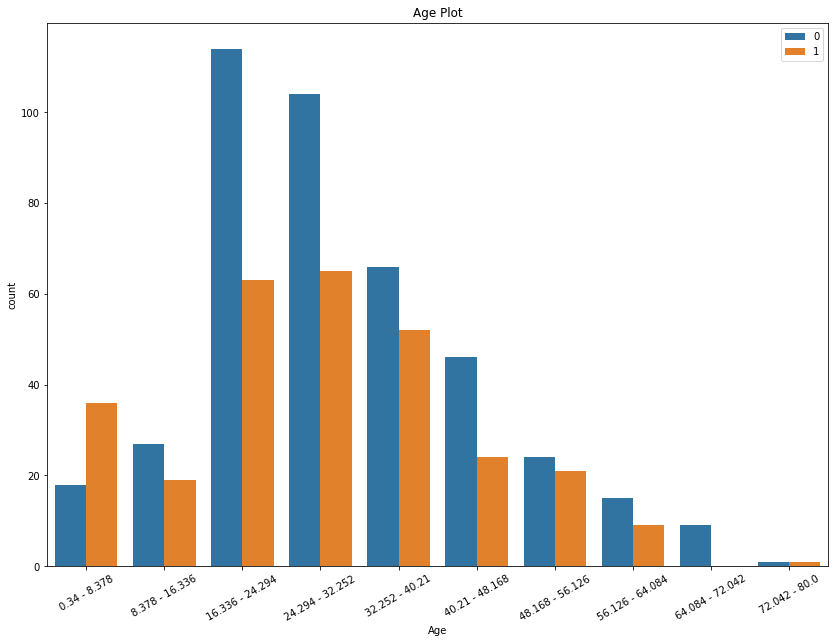

In [ ]:

c = pd.cut(train_df["Age"], bins=10)
def beautify(s):
    return str(s)[1:-1].replace(", ", " - ")
b = c.apply(beautify)
plt.figure(figsize=(14, 10))
sns.countplot(x=b, hue=train_df["Survived"])
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.title("Age Plot")

In [ ]:
# 把每個欄位的範圍標準化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_scale = scaler.fit_transform(datas)
datas_scale = pd.DataFrame(datas_scale, columns = datas.columns)

In [ ]:
x_scale = datas_scale.iloc[:len(train_df)]
predict_scale = datas_scale.iloc[len(train_df):]

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()
# odd better than even *(11, 13, 15,...149)
params = {
    "n_neighbors": range(5, 200),
}
grid = GridSearchCV(clf, params, cv = 10, n_jobs= -1, scoring = "neg_log_loss")
grid.fit(x_scale,y)
print(grid.best_score_)
print(grid.best_params_)

-0.4375600153125087
{'n_neighbors': 33}


In [ ]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale,y)
pre = clf.predict(predict_scale)
ans = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": pre
})
ans.to_csv("knn.csv", encoding = "utf-8", index = False)
